In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta
from matplotlib.dates import DateFormatter

In [2]:
%ls

CustomerAddress_cleaned.csv
CustomerDemo_cleaned.csv
KPMG Task 1 - Customer Address .ipynb
KPMG Task 1 - Customer Demographic Table.ipynb
KPMG Task 1 - New Customers Table.ipynb
KPMG Task 1 - Transactions Table.ipynb
KPMG Task 1 Sample ANS .docx
KPMG Task 1.docx
KPMG Task 2.ipynb
KPMG_VI_New_raw_data_update_final.xlsx
Module_2_Template_slide.pptx
Transactions_cleaned.csv
~$KPMG_VI_New_raw_data_update_final.xlsx


In [3]:
# Import Raw Data
data = pd.ExcelFile("KPMG_VI_New_raw_data_update_final.xlsx")

In [4]:
# Seperate Data by Sheets
CustomerDemo = pd.read_excel(data, 'CustomerDemographic')

In [5]:
new_header = CustomerDemo.iloc[0]
CustomerDemo.columns = new_header
CustomerDemo = CustomerDemo.loc[1:]

In [6]:
CustomerDemo.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15


In [7]:
# Default Column Values look inconsistent and show no relevance
# Drop this column
CustomerDemo = CustomerDemo.drop('default', axis=1)

In [8]:
CustomerDemo.shape

(4000, 12)

In [9]:
CustomerDemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 1 to 4000
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   object
 1   first_name                           4000 non-null   object
 2   last_name                            3875 non-null   object
 3   gender                               4000 non-null   object
 4   past_3_years_bike_related_purchases  4000 non-null   object
 5   DOB                                  3913 non-null   object
 6   job_title                            3494 non-null   object
 7   job_industry_category                3344 non-null   object
 8   wealth_segment                       4000 non-null   object
 9   deceased_indicator                   4000 non-null   object
 10  owns_car                             4000 non-null   object
 11  tenure                               3913 n

In [10]:
CustomerDemo.describe()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
count,4000,4000,3875,4000,4000,3913,3494,3344,4000,4000,4000,3913
unique,4000,3139,3725,6,100,3448,195,9,3,2,2,22
top,1,Max,Pristnor,Female,16,1978-01-30 00:00:00,Business Systems Development Analyst,Manufacturing,Mass Customer,N,Yes,7
freq,1,5,3,2037,56,7,45,799,2000,3998,2024,235


In [11]:
# Count Duplicated Items
CustomerDemo.duplicated().sum()

0

In [12]:
# Count Unique Number of Items
CustomerDemo.nunique() 

0
customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
owns_car                                  2
tenure                                   22
dtype: int64

In [13]:
# Check for Missing Values for each Column
CustomerDemo.isnull().sum()

0
customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [14]:
index = ['gender', 'DOB', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car']

for item in index:
    print(CustomerDemo[item].value_counts())
    print('\n')

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64


1978-01-30    7
1964-07-08    4
1962-12-17    4
1978-08-19    4
1977-05-13    4
             ..
1989-06-16    1
1998-09-30    1
1985-03-11    1
1989-10-23    1
1991-11-05    1
Name: DOB, Length: 3448, dtype: int64


Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64


Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64


N    3998
Y       2
Name: deceased_indicator, dtype: int64


Yes    2024
No     1976
Name: owns_car, dtype: int64




In [15]:
# Gender Category has incorrect titles
# Replace incorrect titles with appropriate titles
CustomerDemo['gender'] = CustomerDemo['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female')

# Rename category U --> Unspecified
CustomerDemo['gender'] = CustomerDemo['gender'].replace('U','Unspecified')

In [16]:
CustomerDemo['gender'].value_counts()

Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64

In [17]:
# Convert DOB to DateTime Format
CustomerDemo['DOB'] = pd.to_datetime(CustomerDemo['DOB'])

In [18]:
CustomerDemo['DOB'].describe(datetime_is_numeric = True)

count                          3913
mean     1977-07-12 23:56:41.277792
min             1843-12-21 00:00:00
25%             1968-01-22 00:00:00
50%             1977-07-22 00:00:00
75%             1987-02-28 00:00:00
max             2002-03-11 00:00:00
Name: DOB, dtype: object

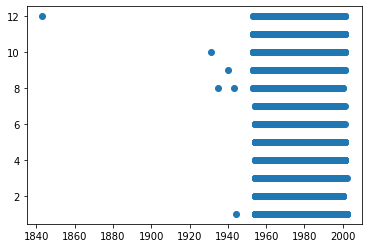

In [19]:
# Check Distribution of DOB Data
plt.scatter([d.year for d in CustomerDemo['DOB']], [d.month for d in CustomerDemo['DOB']])

In [20]:
CustomerDemo.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15


In [21]:
CustomerDemo = CustomerDemo.dropna()

In [22]:
# Change Yes / No Values to Binary Values for later Analysis

### Deceased Indicator Y = 1 / N = 0
CustomerDemo['deceased_indicator'].replace(['Y'], 1, inplace=True)
CustomerDemo['deceased_indicator'].replace(['N'], 0, inplace=True)

### Owns Car Y = 1 / N = 0
CustomerDemo['owns_car'].replace('Yes', 1, inplace=True)
CustomerDemo['owns_car'].replace('No', 0, inplace=True)

In [23]:
# Drop DOB data with DOB in 1800s
CustomerDemo = CustomerDemo[CustomerDemo['DOB'] != CustomerDemo.DOB.min()]

# Drop Deceased Customers
CustomerDemo[CustomerDemo['deceased_indicator'] == 0]
CustomerDemo = CustomerDemo.drop(['deceased_indicator'], axis=1)

In [25]:
# Create Age Column for Further Analysis
CustomerDemo['age'] = (dt.now() - CustomerDemo['DOB']) / np.timedelta64(1, 'Y')
CustomerDemo['age_group'] = ((round(CustomerDemo['age'] / 10)) * 10).astype(int)

In [26]:
CustomerDemo.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,age_group
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,1,11,69.303980,70
2,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,1,16,42.124777,40
3,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,1,15,69.030190,70


In [27]:
CustomerClean = CustomerDemo.dropna()

In [28]:
CustomerClean.shape

(2779, 13)

In [29]:
CustomerClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2779 entries, 1 to 3997
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2779 non-null   object        
 1   first_name                           2779 non-null   object        
 2   last_name                            2779 non-null   object        
 3   gender                               2779 non-null   object        
 4   past_3_years_bike_related_purchases  2779 non-null   object        
 5   DOB                                  2779 non-null   datetime64[ns]
 6   job_title                            2779 non-null   object        
 7   job_industry_category                2779 non-null   object        
 8   wealth_segment                       2779 non-null   object        
 9   owns_car                             2779 non-null   int64         
 10  tenure      

In [30]:
# Save to csv file after the cleaning
CustomerClean.to_csv('./CustomerDemo_cleaned.csv', index = False)